In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
np.random.seed(5675)

# Spam e-mail Classification with Machine Learning algorithms

## Is it possible to reliably distinguish between spam and non-spam e-mails solely based on their content by the means of machine learning algorithms? Which of the most popular classification algorithm performs best at this task?

### Introduction

Spam e-mails are a problem that almost all computer users face on a daily basis. The spam e-mails come from people they don't know or companies they are not familiar with and they clog their Inbox with irrelevant content. Latest statistics shows that spam messages accounted for 56.87% of e-mail traffic worldwide and the most familiar types of spam emails were healthcare and dating spam.[1]

On one hand this problem is irritating, because important messages can be hidden under layers of spam and generally take extra time to sort, delete and read the important ones. This is especially bad at the workplace, where not filtering out the spam means lower overall performance and time wasted instead of focusing on the workload and therefore financial losses for the company. 

On the other hand the contents of spam e-mails can be harmful - they may contain malicious attachments or links that may infect the computer or threats and extortion messages that cause distress to the user. 

This is a well known issue that potentially has negative effects for both companies and individuals, which is why most e-mail services have developed intricate filtering mechanisms.  Completely automated solutions bounce or delete all suspected spam, while semi-automated solutions put suspected spam aside for a human to examine.[2] The goal of this project is to develop a model that learns based on already labeled as spam or non-spam e-mails and is then able to assign new incoming e-mails to one of the two groups. 

### Data Description

The models will be trained on data that describes the content of an e-mail in numerical word or character frequencies. The owners of the dataset have created a list of words and characters to use as a filter for their particular e-mails included in the set, so this is a very personalized set of words, and such should be individually created for other purposes with text processing tqchniques for example.

In [3]:
spam_data = pd.read_csv('data/dataset_44_spambase.csv')
spam_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Data source: https://www.openml.org/d/44

Original source: https://archive.ics.uci.edu/ml/datasets/spambase

Let's take a closer look at the data. There are 57 explanatory variables and 1 target.
The target is in the last column 'class' and it takes two possible values:

- 1 when the e-mail is considered spam
- 0 otherwise

The features can be divided in 3 groups:

- word fequency columns with the header format word_freq_XXXX, where XXXX is a cecrtain word - 48 in total
- character frequencies with the header format char_freq_YYYY, where YYYY is a certain character sqeuence - 6 in total
- length of sequence of capitalized letters - average, longest and total - 3 in total

The frequencies are represented in percentages of all words and characters within one e-mail. All column names can be viewed below.

In [4]:
spam_data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


The data should be inspected for missing values and wrong data types before proceeding.

In [5]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

It seems like the dataset has no missing data and the data types are correctly recognized. All are numerical as expected.

It is also important to check whether the two target classes are equally represented within the data. 

[]

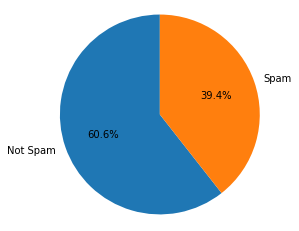

In [6]:
plt.figure(figsize = (4, 4))
plt.pie(spam_data['class'].value_counts(),labels = ['Not Spam', 'Spam'], autopct = '%1.1f%%', startangle=90)
plt.axis('equal')
plt.plot()

Around 60% of the recorded data represents non-spam e-mails and 40% is spam. Though the dataset is not perfectly balanced, this is an acceptable ratio between the count of observations within each class.

### Preprocessing

In this section the given data will be first divided in two - features and target (labels). This is done because the uderlying task of this project is one of supervised learning, where the real output is known and compared to the predictions of the models.

Then the will be split into training, validation and testing sets. Validation and testing will include roughly 700 records or 15% of the data each, while the most part of the set will be left for training (70% or around 3000 records). The stratisfy argument is passed to the train_test_split function, so that spam e-mails are evenly distributed in all sets and the ratio spam/non-spam is maintained. The chosen models will be first trained on the train set as usual. The validation set will be used for scoring to fine-tune the hyperparameters of the models and hopefully increase their accuracy and other scores. This method of validation is chosen over the widely used cross-validation folds in order to reduce computation time and because it will be used on quite a few differently tuned models.

Lastly the data in each set will be scaled with a StandardScaler() separately. This step ensures the better performance of the classification algorithms, decision trees and support vector machines in particular. Every set is scaled on it's own so that information from the training set doest not 'spill' into the testing and validation sets. We treat them as records that are obtained after the development of the models, therefore as brand new data points. 

In [7]:
spam_features = spam_data.drop('class', axis = 1)
spam_target = spam_data['class']

In [8]:
spam_features_train, spam_features_testandnval, spam_target_train, spam_target_testandval = train_test_split(spam_features, spam_target, train_size = 0.7, stratify = spam_target, random_state = 5675)

In [9]:
spam_features_val, spam_features_test, spam_target_val, spam_target_test = train_test_split(spam_features_testandnval, spam_target_testandval, test_size = 0.5, stratify = spam_target_testandval, random_state = 5675)

In [10]:
spam_features_train.shape

(3220, 57)

In [11]:
spam_features_val.shape

(690, 57)

In [12]:
spam_features_test.shape

(691, 57)

In [13]:
scaler = StandardScaler()
spam_features_train_scaled = scaler.fit_transform(spam_features_train)
spam_features_val_scaled = scaler.transform(spam_features_val)
spam_features_test_scaled = scaler.transform(spam_features_test)

### Training and Improving Models

In this section the most well-known classification models will be compared and namely: 

- Logistic Regression
- Support Vector Machine
- Decision Tree

The strategy for the proccess of tuning the parameters will follow this route - first check the performance of the baseline models without any tuning to have a starting point and a validation set score for comparison. Then for each model the few most impactful parameters will be tuned to try and improve the score. Finally, the model with the highest performance on the validation set will be chosen and scored on the training set.   


1. Base models with default hyperparameters

Here are the default models witht their hyperparameters provided by scikit-learn.


In [14]:
default_logit = LogisticRegression(random_state = 5675)
default_logit.fit(spam_features_train_scaled, spam_target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5675, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
default_SVM = SVC(random_state=5675)
default_SVM.fit(spam_features_train_scaled, spam_target_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=5675, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
default_tree = DecisionTreeClassifier(random_state=5675)
default_tree.fit(spam_features_train_scaled, spam_target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5675, splitter='best')

2. Hyperparameter tuning

For this part of the project it is not realistic to try all different combinations of parameters to achieve some sort of improvement. That's why it is preferable to focus on just a few parameters for each algorithm, which have the most impact on the score and then try different combinations of the parameters with GridSearchCV. 

First let's choose two to three most important parameters for each model and then decide also three to four reasonable values within a given range for those hyperparameters. This limitation to fewer hyperparameters and smaller value ranges is for the purpose of lowering computational complexity, while still achieving good results. [3] 

According to an article on tuning hyperparameters [4] ponints out that for Logistic Regression parameters that could lead to an improvement are the penalty strength C, the solver and regularization penalty. The same source says that for SVM the important hyper parameters are also C (on a logaritmic scale) and the kernels that go hand in hand with the kernel coefficient gamma. For Decision trees it is advisable to tune among others the criterion on which that the split is based, max_depth that controls the levels of the tree and min_samples_leaf that is the minimum number of samples that are each final node (leaf) contains.[5]

Here is a summary of the chosen hyperparameters and their values that will be used for tuning:

##### Logistic Regression
- C: 1, 10, 100, 1000; 
- penalty: 'l1', 'l2';
- solver: 'liblinear', 'saga', 'lbfgs'; 

The idea here is to increase the penalty strength and therefore reduce regularization (C = 1/lambda) and try 'l1' and 'l2' penalties that set coefficients to 0 or just reduce them respectively and try out different solvers, chosen to support either one or both types of penatlies.

#####  Support Vector Machine

- C: 1, 10, 100; 
- gamma: 0.01, 0.001, 0.0001; 
- kernel: 'rbf', 'linear';

In this case the penalty strenth is also increased on exponential scale, as well as two differen kernels - the linear and the Gaussian that maps the data in multiple dimensions to see which will be better at the task of separating the emails. The kernel coefficient gamma is passed only for the rbf kernel and is and again small exponentially decreasing values are chosen. The role of gamma is to determin how far two points can be and still be considered similar, as smaller gammas increase this distance. 

##### Decision Tree

- criterion: 'gini'; 'entropy'; 
- max_depth: 10, 5, 3, None; 
- min_samples_leaf: 1, 5, 10, 50

For the decision tree the tuned hyperparameters will be the impurity measure or criterion for splitting - gini or entropy, to see which one performs better even though they are very similar. Different values form max_depth in the range oe 3 to 10 will be tried out to see if pruning will give better results. The same goes for the other hyperparameter, namely min_samples_leaf that could stop the splitting earlier with growing values.

In [17]:
params = [{'C': [1, 10, 100, 1000], 'solver': ['saga', 'liblinear'], 'penalty':['l2','l1']},
           {'C': [1, 10, 100, 1000], 'solver': ['lbfgs'], 'penalty':['l2']}]

grid_search_logit = GridSearchCV(LogisticRegression(random_state = 5675), params, cv = 10, scoring = 'accuracy')

In [18]:
grid_search_logit.fit(spam_features_train_scaled, spam_target_train)

C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Desy\anaconda3\lib\site-packages\skle

C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Desy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=5675, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'penalty': ['l2', 'l1'],
                          'solver': ['saga', 'liblinear']},
                         {'C': [1, 10, 100, 1000], 'penalty': ['l2'],
                          'solver': ['lbfgs']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [19]:
tuned_logit = grid_search_logit.best_estimator_

In [20]:
grid_search_logit.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [21]:
grid_search_logit.best_score_

0.9288819875776397

In [22]:
params = [{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
         {'C': [1, 10, 100], 'kernel': ['linear']}]
grid_search_SVM = GridSearchCV(SVC(random_state=5675), params, cv = 10, scoring = 'accuracy')

In [23]:
grid_search_SVM.fit(spam_features_train_scaled, spam_target_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=5675, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [24]:
grid_search_SVM.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=5675, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
grid_search_SVM.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [26]:
grid_search_SVM.best_score_

0.9388198757763975

In [27]:
tuned_SVM = grid_search_SVM.best_estimator_

In [28]:
params = {"max_depth": [10, 5, 3, None],
          "min_samples_leaf": [1, 5, 10, 50],
          "criterion": ["gini", "entropy"]}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=5675), params, cv = 10, scoring = 'accuracy')

In [29]:
grid_search_tree.fit(spam_features_train_scaled, spam_target_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=5675,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [30]:
tuned_tree = grid_search_tree.best_estimator_

In [31]:
grid_search_tree.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [32]:
grid_search_tree.best_score_

0.9201863354037266

### Final evaluation and best model selection

In [33]:
default_logit_score = default_logit.score(spam_features_val_scaled, spam_target_val)*100
default_SVM_score = default_SVM.score(spam_features_val_scaled, spam_target_val)*100
default_tree_score = default_tree.score(spam_features_val_scaled, spam_target_val)*100

tuned_logit_score = tuned_logit.score(spam_features_val_scaled, spam_target_val)*100
tuned_SVM_score = tuned_SVM.score(spam_features_val_scaled, spam_target_val)*100
tuned_tree_score = tuned_tree.score(spam_features_val_scaled, spam_target_val)*100

print(f'Accuracy of Logistic Regression before tuning is {default_logit_score:0.4f} % and after tuning is {tuned_logit_score:.4f} %. Increase of {tuned_logit_score - default_logit_score}')
print(f'Accuracy of Support Vector Classifier before tuning {default_SVM_score:0.4f} % and after tuning is {tuned_SVM_score:.4f} %. Increase of {tuned_SVM_score - default_SVM_score}')
print(f'Accuracy of Decision tree Classifier before tuning {default_tree_score:0.4f} % and after tuning is {tuned_logit_score:.4f} %. Increase of {tuned_tree_score - default_tree_score}')

Accuracy of Logistic Regression before tuning is 92.4638 % and after tuning is 92.8986 %. Increase of 0.4347826086956559
Accuracy of Support Vector Classifier before tuning 92.8986 % and after tuning is 93.4783 %. Increase of 0.5797101449275317
Accuracy of Decision tree Classifier before tuning 92.1739 % and after tuning is 92.8986 %. Increase of 0.28985507246376585


Because we have very good models to begin with, the improvment by tuning as seen above is not dramatic. However, the best performing model after tuning is the Support Vector Classifier, let's see how it performs on unseen data, measured by other common classification scores.

In [34]:
print(classification_report(spam_target_test, tuned_SVM.predict(spam_features_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       419
           1       0.92      0.89      0.90       272

    accuracy                           0.92       691
   macro avg       0.92      0.92      0.92       691
weighted avg       0.92      0.92      0.92       691



In [35]:
print(confusion_matrix(spam_target_test, tuned_SVM.predict(spam_features_test_scaled)))

[[397  22]
 [ 31 241]]


The support vector classifier shows satisfactory scores and was abe to correctly classify 397 out of the 419 non-spam e-mails (True Negatives) and 241 out of 272 spam e-mails (True Positives). 

In conclusion, it is obvious that the developed filter for spam e-mails in this dataset is a good indicator to destinguis between spam and non-spam and all tested machine learning algorithms performed quite good. Trough series of tuning experiments we arrived at a somewhat improved model and selected the tuned Support Vector Classifier out of all models and it gives high results for all classification scores such as accuracy, precision and recall.

### Sources

[1] Emmanuel Gbenga Dada, Joseph Stephen Bassi, Haruna Chiroma, Shafi'i Muhammad Abdulhamid, Adebayo Olusola Adetunmbi, Opeyemi Emmanuel Ajibuwa, Machine learning for email spam filtering: review, approaches and open research problems, Heliyon, Volume 5, Issue 6, 2019, e01802, ISSN 2405-8440,https://doi.org/10.1016/j.heliyon.2019.e01802 (http://www.sciencedirect.com/science/article/pii/S2405844018353404)

[2] Lorrie Faith Cranor and Brian A. LaMacchia. Spam! Communications of the ACM. Vol. 41, No. 8 (Aug. 1998), Pages 74-83. Definitive version: http://www.acm.org/pubs/citations/journals/cacm/1998-41-8/p74-cranor/

[3] Amazon SageMaker Developer Guide, Best Practices for Hyperparameter Tuning, https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning-considerations.html

[4] Jason Brownlee, Tune Hyperparameters for Classification Machine Learning Algorithms, https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

[5] Mukesh Mithrakumar, How to tune a Decision Tree?, https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680 